### Ovärlds Analys

In [14]:
#Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import ReduceLROnPlateau

import numpy as np
import pandas as pd
import os

In [15]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [16]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [17]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


### Data Analys

In [19]:
train_df = pd.DataFrame(train)
test_df  = pd.DataFrame(test)

test_sorted_label_count = np.array(test_df['label'].value_counts().sort_index())
train_sorted_label_count = np.array(train_df['label'].value_counts().sort_index())
values_list = list(test_df.value_counts('label'))
values_list_ = list(test_df.value_counts('label'))


total_data_sorted_label_count = train_sorted_label_count + test_sorted_label_count

label_percentage = [x / total_data_sorted_label_count
                    for x in total_data_sorted_label_count]
print(total_data_sorted_label_count)


[1457 1442 1454 1441 1455 1451 1438 1449 1450 1445 1450 1449 1442 1442
 1435 1443 1438 1445 1434 1427 1428 1431 1431 1450]


In [20]:
total_data = len(np.array(train)) + len(np.array(test))
# total_data = pd.DataFrame(total_data)

/var/folders/wx/13s0x3dx7js1glvvgkht18hc0000gn/T/ipykernel_67896/706026584.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


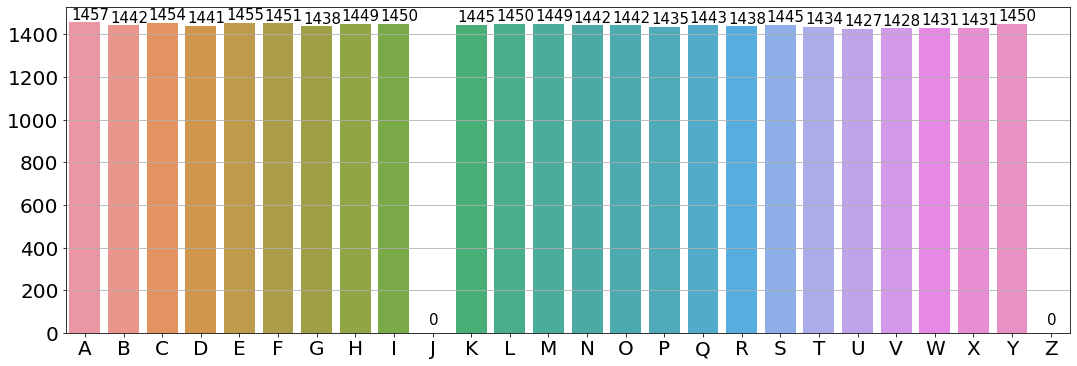

In [21]:
# List of 26 letter in the english alphabet
alphabet = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I',    
            'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 
            'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
np.array(alphabet)

label_count = np.array(train_df['label'].value_counts().sort_index()+test_df['label'].value_counts().sort_index())
label_count = np.insert(label_count, 9, 0)
label_count = np.append(label_count, 0)

labels_info = pd.DataFrame(zip(alphabet, total_data_sorted_label_count))

plt.figure(figsize=(18,6))
plt.grid(b=None)
plt.tick_params(axis='both', labelsize= 20)
# sns.set_style(None)
# sns.set(rc={'figure.facecolor':'cornflowerblue', 'axes.facecolor':'cornflowerblue'})

letter_count = sns.barplot(x=alphabet, y=label_count, data=labels_info)

for letter in range(len(alphabet)):
    x, y = letter - 0.35, label_count[letter] + 15
    angel,text = 0, str(label_count[letter])
    if y == +15:
        y, x, angel, text = 40, letter - 0.1, 0, '0'
    plt.text(x, y, text , rotation=angel, size= 15, color = 'black', weight= 'medium', )
# description = 'Note that there are only 24 letters in this dataset. \
# Although the ASL "American sign language" has 26. \
# J and Z are missing because in order\nto sign them you \
# need to add movement and this dataset is composed \
# of 2d images witch have no features corresponding to movement.'

# plt.text(-0.5, -300, description, weight='medium', fontsize= 18)

plt.savefig('barplot_letter.png')

In [22]:
example_img = []
letter_labels = []
for row_index in range(len(train)):
    if train.iloc[row_index][0] not in letter_labels and len(example_img) == len(letter_labels):
        example_img.append(np.array(train.iloc[row_index][1:]).reshape(28, 28))
        letter_labels.append(train.iloc[row_index][0])
    elif len(letter_labels) == 24:
        break
example_img_index = list(zip(letter_labels, example_img))
example_img_index.sort()

In [24]:
print(example_img_index)

[(0, array([[197, 195, 196, 195, 197, 196, 195, 196, 196, 196, 200, 199, 196,
        198, 197, 197, 198, 197, 197, 198, 198, 198, 199, 198, 198, 195,
        195, 195],
       [197, 196, 197, 197, 199, 199, 198, 198, 198, 197, 202, 200, 199,
        198, 198, 200, 198, 196, 199, 199, 196, 199, 198, 198, 198, 197,
        198, 197],
       [197, 198, 199, 198, 198, 201, 200, 197, 200, 202, 201, 200, 200,
        200, 199, 201, 201, 198, 198, 201, 198, 199, 198, 199, 199, 197,
        197, 197],
       [200, 200, 199, 200, 200, 201, 199, 200, 191, 183, 201, 195, 191,
        197, 198, 194, 196, 204, 204, 203, 205, 199, 198, 199, 200, 198,
        198, 198],
       [201, 199, 200, 201, 202, 199, 199, 212, 182, 115, 113, 171, 162,
        143, 176, 184, 162, 148, 184, 183, 181, 198, 205, 201, 199, 200,
        199, 199],
       [201, 201, 201, 202, 200, 202, 200, 207, 189, 105,  43, 147, 165,
         98,  95, 175, 147,  82,  83, 147, 112, 107, 150, 204, 201, 200,
        200, 199],
     

In [25]:
print(alphabet)
alphabet_pop_J_Z = [alphabet[x] for x in range(len(alphabet)) if x not in [9,25]] 
print(alphabet_pop_J_Z)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


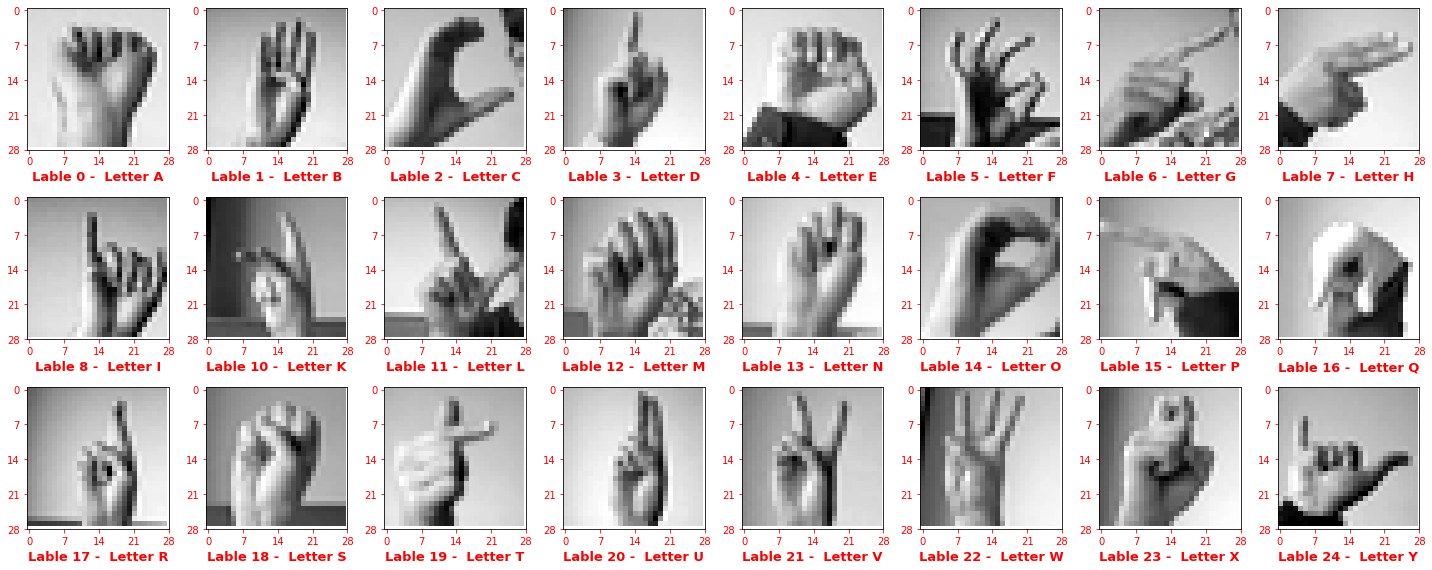

In [43]:
rows, columns = 3, 8
fig, ax = plt.subplots(rows, columns, squeeze=True)
# multiplier = 3.5
fig.set_size_inches(20, 20)

k = 0
for y in range(rows):
    for x in range(columns):
        ax[y,x].imshow(example_img_index[k][1], cmap='gray')
        x_label = 'Lable ' + str(example_img_index[k][0]) + ' -  Letter ' + alphabet_pop_J_Z[k]
        ax[y,x].set_xlabel(x_label,size=13, weight= 'heavy', color='red')
        ax[y,x].axes.xaxis.set_ticks([x for x in range(0, 29, 7)])
        ax[y,x].axes.yaxis.set_ticks([x for x in range(0, 29, 7)])
        ax[y,x].tick_params(axis='x', colors='red')
        ax[y,x].tick_params(axis='y', colors='red')

        k += 1
    plt.tight_layout(h_pad= -25)
plt.savefig('image_data_grid.png')
plt.show()


### Data cleaning

In [ ]:
y_train = train['label']
y_test  = test['label']

x_train = train.iloc[:,1:]
x_test  = test.iloc[:,1:]

x_train = np.array(x_train).reshape(-1, 28, 28,1)
x_test  = np.array(x_test).reshape(-1, 28, 28, 1)

In [ ]:
x_train_shape, x_test_shape = x_train.shape, x_test.shape
y_train_shape, y_test_shape = y_train.shape,  y_test.shape

print(  f'x_train shape: {x_train_shape}\n'
        f'x_test shape:  {x_test_shape}\n'
        f'y_train shape: {y_train_shape}\n'
        f'y_test shape:  {y_test_shape}\n')


x_train shape: (27455, 28, 28, 1)
x_test shape:  (7172, 28, 28, 1)
y_train shape: (27455,)
y_test shape:  (7172,)



In [ ]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(f'y_train: {y_train[1].shape}\n', f'y_test: {y_test.shape}')

y_train: (25,)
 y_test: (7172, 25)


### Problemformulering och Preprocesing

In [ ]:
x_train[0].shape

(28, 28, 1)

### Data Centrisk Approach

### Model Design

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, BatchNormalization, Flatten

model = Sequential([
    Conv2D(filters= 32, kernel_size= (1,3),padding='same', activation='relu', input_shape= (28, 28, 1)),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.1),

    Conv2D(filters= 32, kernel_size= (3,1),padding='same', activation='relu', input_shape= (28, 28, 1)),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.1),

    Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.1),

    Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.1),
    Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(n_labels, activation='softmax'),

])
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 28, 28, 32)        128       
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_53 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_54 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_81 (Conv2D)          (None, 14, 14, 32)        3104      
                                                                 
 max_pooling2d_56 (MaxPoolin  (None, 7, 7, 32)       

In [ ]:
model.compile(  optimizer= 'adam',
                loss = 'categorical_crossentropy', 
                metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=200, epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
138/138 [==============================] - 12s 80ms/step - loss: 0.0713 - accuracy: 0.9820 - val_loss: 0.2191 - val_accuracy: 0.9396
Epoch 2/5
138/138 [==============================] - 13s 91ms/step - loss: 0.0230 - accuracy: 0.9935 - val_loss: 0.2204 - val_accuracy: 0.9399
Epoch 3/5
138/138 [==============================] - 11s 82ms/step - loss: 0.0107 - accuracy: 0.9976 - val_loss: 0.2112 - val_accuracy: 0.9442
Epoch 4/5
138/138 [==============================] - 11s 77ms/step - loss: 0.0084 - accuracy: 0.9980 - val_loss: 0.3311 - val_accuracy: 0.9268
Epoch 5/5
138/138 [==============================] - 11s 82ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.1658 - val_accuracy: 0.9541


In [ ]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 2s 8ms/step - loss: 0.1658 - accuracy: 0.9541
Accuracy of the model is -  95.41271328926086 %


### Algoritmval/Modelcentrisk Approach

In [ ]:
...

Ellipsis

### Model Evaluation

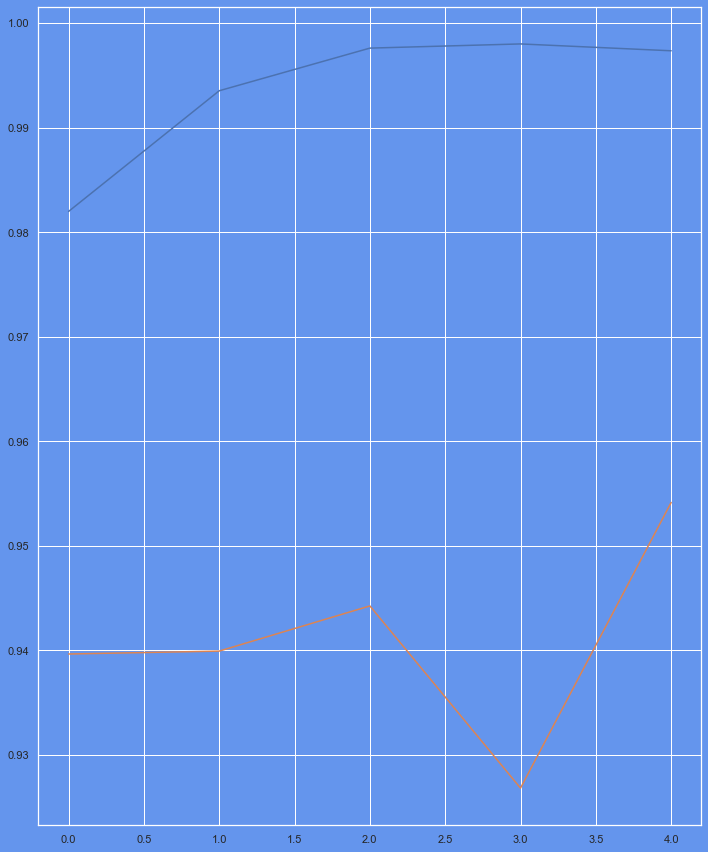

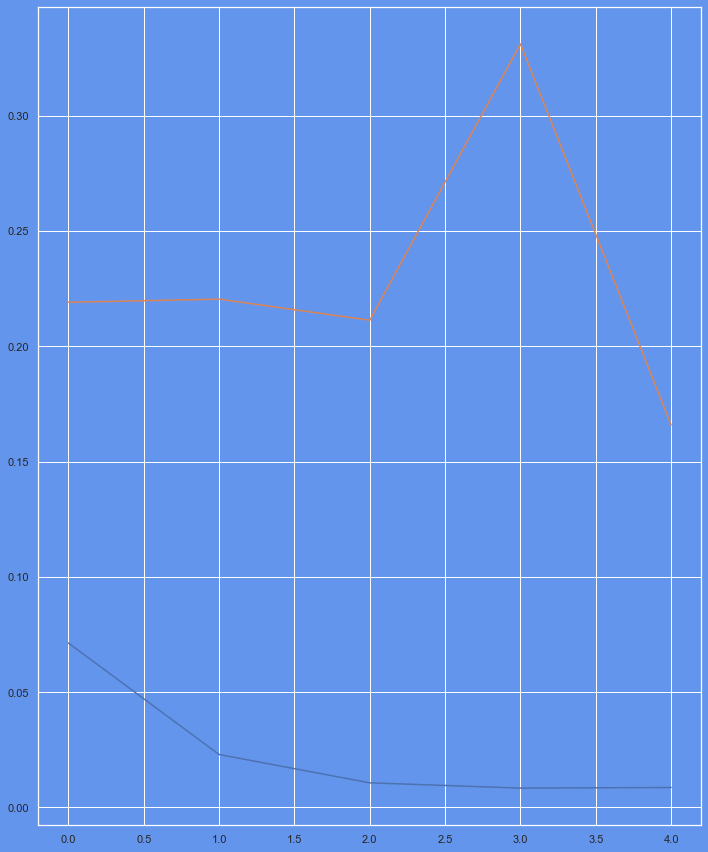

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

### Computer Vision With OpenCV ;)

In [ ]:
...

Ellipsis